# 1. Import Modules

In [91]:
#Import Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns


# 2. Webscrape

## Reading data..

In [92]:
#We do not select season 2016-17 due to it having no column: now_cost
#Difference between raw and clean data is the team index. Raw data has, but clean data does not. 

raw_data = {}
raw_frames = []
clean_data = {}
clean_frames = []

season = ['2017-18','2018-19','2019-20','2020-21']

for year in season:
    clean_data[year] = pd.read_csv('data/' + year + '/cleaned_players.csv')

for key, df in clean_data.items():
    df.sort_values('total_points',ascending=False,inplace=True)
    df['now_cost'] = df['now_cost']/10
    df['ppv'] = df['total_points']/df['now_cost']
    df['year'] = key[:4]
    clean_frames.append(df)

for year in season:
    raw_data[year] = pd.read_csv('data/' + year + '/players_raw.csv')

for key, df in raw_data.items():
    df.sort_values('total_points',ascending=False,inplace=True)
    df['year'] = key[:4]
    raw_frames.append(df)


In [93]:
#Only contains the data for 2021 season
#players_data = pd.read_csv('players_understat.csv')


#Map team_id with team_name
team_data = pd.read_csv('data/master_team_list.csv')
team_data['season'] = team_data['season'].map(lambda x: x[:4])
team_data.rename(columns ={'season':'year'},inplace=True)


#Contains data for every season
#CSV was downloaded from Google Colab notebook.
players_data = pd.read_csv('data/players_stats.csv')
players_data.drop(['Unnamed: 0','id'],axis=1,inplace=True)


In [125]:
#Concat Dataframes in List 
raw_result = pd.concat(raw_frames).reset_index()
clean_result = pd.concat(clean_frames).drop(['element_type'],axis=1).reset_index()

raw_result.columns
raw_result[['year','first_name','second_name','element_type','team']] #Columns we need.
team_data.columns

#Join columns we need, with the team_data.
join_1 = raw_result.join(team_data.set_index(['year','team']), on = ['year','team'])[['year','first_name','second_name','element_type','team_name']]

#Merge join_1 with clean_result
join_df=clean_result.merge(join_1,on=['year','first_name','second_name'])
#join_df=join_df.merge(players_data,on=['year'])
#clean_result.join(join_1.set_index(['year','first_name','second_name']), on=['year','first_name','second_name']).reset_index()


def position_name(x):
    if x==1:
        return 'GK'
    elif x==2:
        return 'DEF'
    elif x==3:
       return 'MID'
    else:
        return 'FWD'

#Adding columns to join_df df

join_df.drop(['index'], axis=1, inplace=True)
join_df['position']=join_df.apply(lambda x:position_name(x['element_type']),axis=1)
join_df['player_name'] = join_df['first_name'] + ' ' + join_df['second_name'] 
join_df['year']=join_df['year'].astype('int64')

#ame(x[#'element_type']), join_df.apply(lambda x: x['now_cost']/) ##Find the difference## between eppv and ppv=1)
#join_df['eff_ppv'] =  bn
#Join the raw and clean result 
#result = clean_result.join(raw_result, on = '') 

#Change year to INT
#result.year = result.year.astype('int64')

#result[result.year==2019].head(10)

## Create players_df dataframe:

In [128]:
#Create players_df with selected columns.
players_data[players_data.player_name=='Harry Kane']
players_df=players_data[['year','player_name','games','time','xG','xA','shots','key_passes','npg','npxG','xGChain','xGBuildup']]
players_df.head(20)


,year,player_name,games,time,xG,xA,shots,key_passes,npg,npxG,xGChain,xGBuildup
0,2017,Mohamed Salah,36,2954,25.136503,8.344478,143,62,31,23.614165,35.301465,5.898578
1,2017,Harry Kane,37,3094,26.859891,3.820441,183,34,28,24.576384,28.515266,7.961634
2,2017,Sergio Agüero,25,1985,18.568618,6.533230,95,39,17,15.523943,23.707815,7.512719
3,2017,Jamie Vardy,37,3269,15.266967,3.630826,70,33,15,10.699991,15.584634,1.977742
4,2017,Raheem Sterling,33,2594,18.829967,8.844116,87,55,17,18.068798,33.656717,12.149657
...,...,...,...,...,...,...,...,...,...,...,...,...
2459,2021,Christos Tzolis,2,88,0.000000,0.188866,0,3,0,0.000000,0.201693,0.026190
2460,2021,Bali Mumba,1,43,0.000000,0.000000,0,0,0,0.000000,0.000000,0.000000
2461,2021,Andrew Omobamidele,1,90,0.000000,0.000000,0,0,0,0.000000,0.012827,0.012827
2462,2021,Shandon Baptiste,3,148,0.025057,0.000000,1,0,0,0.025057,0.025057,0.000000


## Creating Final Dataframe (fpl_df):

In [167]:
#Final_df is our  df to be used for analysis.
final_df=join_df.merge(players_df,how='inner',on=['year','player_name'])

#Verification
final_df[final_df.player_name=='Harry Kane']
final_df.columns

#Clean final_df
fpl_df = final_df[['year','player_name','team_name','position','goals_scored','assists','total_points','goals_conceded','creativity','influence','threat','bonus','bps','ict_index','clean_sheets','now_cost','ppv']]

#Merge with the players stats from Understat
fpl_df=fpl_df.merge(players_df,how='inner',on=['year','player_name'])

In [ ]:
fpl_df.head(10)


Index(['year', 'player_name', 'team_name', 'position', 'goals_scored',
       'assists', 'total_points', 'goals_conceded', 'creativity', 'influence',
       'threat', 'bonus', 'bps', 'ict_index', 'clean_sheets', 'now_cost',
       'ppv', 'games', 'time', 'xG', 'xA', 'shots', 'key_passes', 'npg',
       'npxG', 'xGChain', 'xGBuildup', 'ppg'],
      dtype='object')

# 3. Analysis

### PPV (mean and std)

In [211]:
#PPV
df1 = fpl_df.groupby(by=['year','position']).apply(lambda x: x.sort_values(["ppv"], ascending=False)).reset_index(drop=True)
ppv_df= df1.groupby(by=['year','position']).head(30)
ppv_df.groupby(by=['year','position']).agg(['mean','std'])['ppv']


mean        std
year position                      
2017 DEF       21.998173   1.395245
     FWD       16.508383   2.785705
     GK        16.021169  10.298029
     MID       21.994141   2.735366
2018 DEF       24.141902   3.593300
     FWD       17.391535   4.897696
     GK        14.464272  10.634109
     MID       21.596511   2.696635
2019 DEF       23.488732   3.419567
     FWD       18.008442   4.036906
     GK        15.156171  11.665644
     MID       21.000215   2.084598
2020 DEF       23.629059   2.512532
     FWD       15.993239   5.563273
     GK        14.719864  11.751503
     MID       21.928222   3.252234

### PPG (mean and std)

In [244]:
#PPG
df2 = fpl_df.groupby(by=['year','position']).apply(lambda x: x.sort_values(["ppg"], ascending=False)).reset_index(drop=True)
ppg_df= df2.groupby(by=['year','position']).head(10)
ppg_df.groupby(by=['year','position']).agg(['mean','std'])['ppg']

mean       std
year position                    
2017 DEF       4.807737  0.176975
     FWD       5.042960  1.051944
     GK        4.902419  1.720813
     MID       6.399490  1.171601
2018 DEF       5.397863  0.630372
     FWD       5.141782  0.587808
     GK        4.681675  1.116322
     MID       5.578007  0.930595
2019 DEF       4.791047  0.472385
     FWD       5.149713  0.660719
     GK        4.243066  0.547333
     MID       5.706554  0.991360
2020 DEF       4.669702  0.445002
     FWD       4.996964  0.778626
     GK        4.441382  0.997208
     MID       5.589664  0.509525

### PPV Histogram

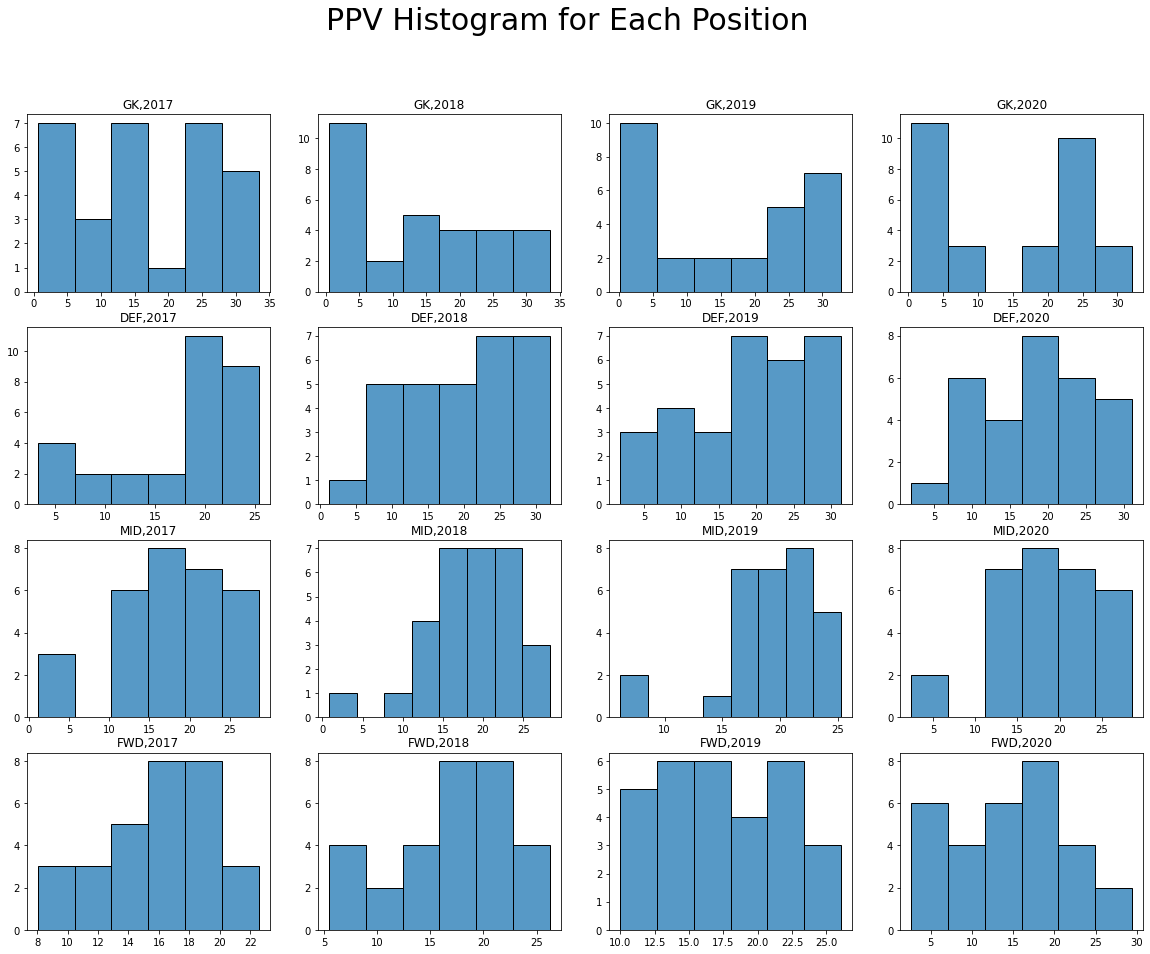

In [212]:
#PPV Histogram


position = ['GK','DEF','MID','FWD']
years = [2017,2018,2019,2020]
step = 1

#Adding Main Fig and Main A
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
fig.suptitle('PPV Histogram for Each Position',fontsize=30)
plt.axis('off')

# Set common labels
ax.set_xlabel('Points Per Value', fontsize=20)
ax.set_ylabel('Count', fontsize = 20)


#Plotting subplots
for x in position:
    for y in years:
        sub_ax = fig.add_subplot(4,4,step)
        data = ppg_df.loc[(ppg_df.position==x) & (ppg_df.year==y)].ppv
        g = sns.histplot(data=data)
        g.set(title = '{},{}'.format(x,y))
        g.set(xlabel=None,ylabel=None)
        step+=1



### PPG Histogram

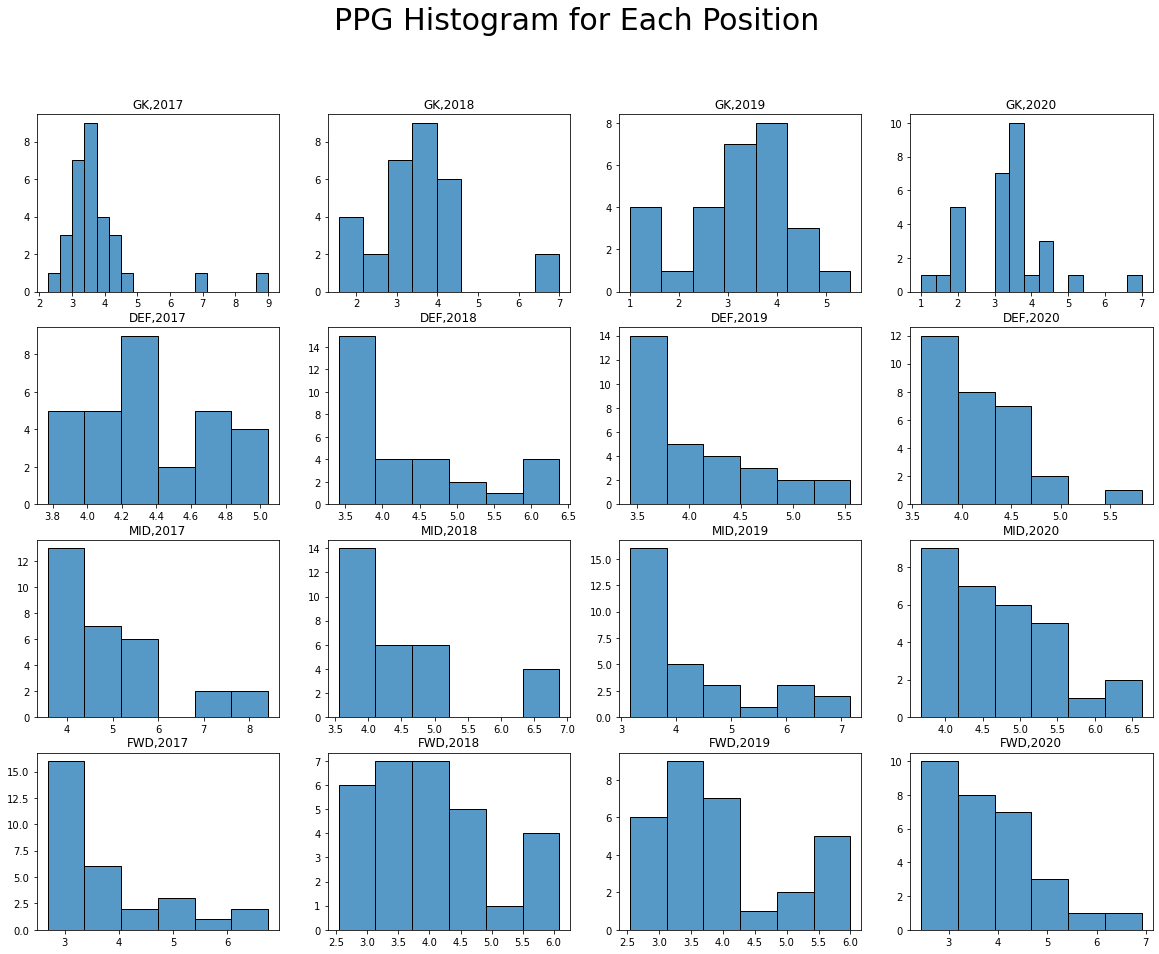

In [216]:
#PPG Histogram


#Adding Main Fig and Main A
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
fig.suptitle('PPG Histogram for Each Position',fontsize=30)
plt.axis('off')

# Set common labels
ax.set_xlabel('Points Per Value', fontsize=20)
ax.set_ylabel('Count', fontsize = 20)


#Plotting subplots
for x in position:
    for y in years:
        sub_ax = fig.add_subplot(4,4,step)
        data = ppg_df.loc[(ppg_df.position==x) & (ppg_df.year==y)].ppg
        g = sns.histplot(data=data)
        g.set(title = '{},{}'.format(x,y))
        g.set(xlabel=None,ylabel=None)
        step+=1



### BoxPlot (PPG and PPV):

[Text(0.5, 1.0, 'PPG Data: Handing the Captaincy')]

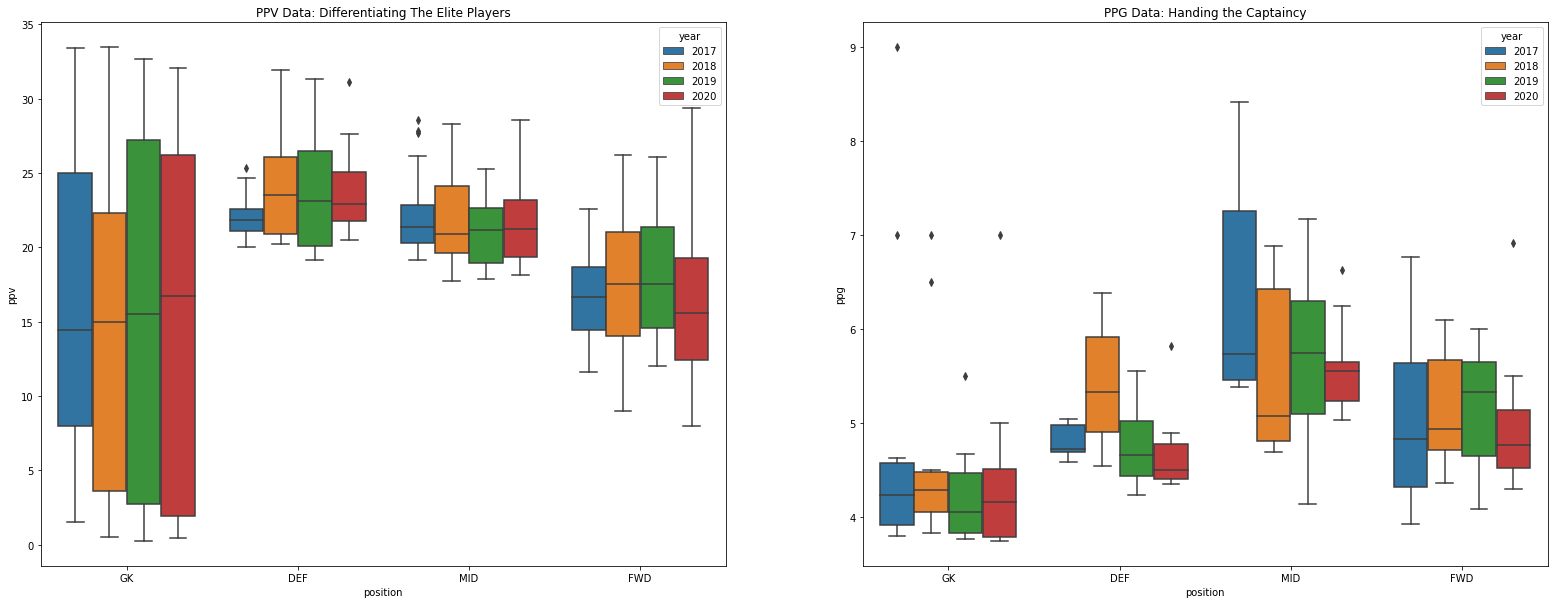

In [245]:
#BoxPlot

fig = plt.figure(figsize=(27,10))
fig.add_subplot(121)
b = sns.boxplot(x='position', y='ppv', hue='year', order = ["GK","DEF","MID","FWD"], data=ppv_df);
b.set(title = 'PPV Data: Differentiating The Elite Players')

fig.add_subplot(122)
c = sns.boxplot(x='position', y='ppg', hue='year', order = ["GK","DEF","MID","FWD"], data=ppg_df);
c.set(title = 'PPG Data: Handing the Captaincy');

#Adding Labels to Outliers - In Progress
#plt.text(0.35K3520,'test)#
#f_data=df
#f1_data.groupby(by=['year','position']).quantile(0.25)['ppv']q1 #= 1_datdfpby(by=['year','position']).quantile(0.25)['ppv'].t7_numpy()
#out#lir_top_#lim = month_q3 + 1month_q3-m#1)oubott#om_lim = month_q1 - 1month_q3-m1)
#p_lim[][11

In [248]:
#Checking...
ppg_df.loc[(ppg_df.year==2020)&(ppg_df.position=='DEF')]

,year,player_name,team_name,position,goals_scored,assists,total_points,goals_conceded,creativity,influence,...,time,xG,xA,shots,key_passes,npg,npxG,xGChain,xGBuildup,ppg
1358,2020,John Stones,Man City,DEF,4,0,128,12,79.8,520.0,...,1933,2.501299,0.046840,15,2,4,2.501299,10.388180,10.288511,5.818182
1359,2020,Antonio Rüdiger,Chelsea,DEF,1,0,93,10,83.8,368.6,...,1710,1.139936,0.305807,14,4,1,1.139936,9.137650,9.044836,4.894737
1360,2020,Benjamin Mendy,Man City,DEF,2,1,63,10,117.1,179.8,...,955,0.334141,0.301440,6,5,2,0.334141,2.769137,2.348603,4.846154
1361,2020,Kortney Hause,Aston Villa,DEF,1,0,32,6,2.2,147.0,...,630,1.303753,0.000000,5,0,1,1.303753,1.804376,1.804376,4.571429
1362,2020,Kurt Zouma,Chelsea,DEF,5,0,108,25,72.6,577.8,...,2024,3.136853,0.081467,27,4,5,3.136853,6.216146,6.133133,4.500000
1363,2020,Stuart Dallas,Leeds,DEF,8,3,171,53,454.6,756.8,...,3412,4.457074,2.084683,48,26,8,4.457074,18.534344,13.809802,4.500000
1364,2020,Trent Alexander-Arnold,Liverpool,DEF,2,8,160,40,1238.8,789.6,...,3040,2.593060,8.576368,55,77,2,2.593060,23.107881,17.648908,4.444444
1365,2020,James Justin,Leicester,DEF,2,2,101,25,290.7,472.2,...,2070,1.517483,2.059136,9,19,2,1.517483,7.665664,5.505036,4.391304
1366,2020,Marcos Alonso,Chelsea,DEF,2,1,57,13,204.1,224.2,...,962,1.824078,1.721699,22,15,2,1.824078,4.643396,2.536424,4.384615
1367,2020,César Azpilicueta,Chelsea,DEF,1,2,113,20,413.3,502.2,...,2189,0.503005,2.575494,11,27,1,0.503005,13.989243,12.338821,4.346154


# Comparing Points against Top 6 from non-top 6.

# 4. Conclusion

### Based from boxplot analysis for PPV (points generated per value): the median for ppv is consistently high for defenders. The boxes are smaller, so they tend to generate a more consistent PPV, as compared to other positions. Forwards have the lowest floor, as well as its median - meaning they are not worth their values as compared to other positions. 

### Based from boxplot analysis for PPG (points generated per game): Points generated by GK are consistent and have a low variation. Points generated per game by MIDs are the highest, which means they have the highest potential to give more points. Captaining them will give us even more points as compared to other positions, irregardless of their price. In addition, DEFs, even though they are cost-efficient, do not generate that much PPG, meaning they're 2nd least for captaincy. Finally, FWDS again consistently rank lower than MIDs, which means MIDs have the most potential. This could also mean that the goal scored by FWDs being recorded as 4 pts instead of 5 (for MIDs) have a significant impact to the number of points generated. 